# <center> Автоматическое распознавание номерных знаков

## Постановка задачи и знакомство с данными

### Описание кейса

В наши дни безопасность стала одной из самых больших забот для любой организации, и автоматизация такой безопасности имеет важное значение. Так, например, в современном мире компании и организации хотят максимально автоматизировать многие задачи, связанные с контролем и мониторингом. Однако многие из существующих решений все еще не являются надежными в реальных ситуациях, обычно зависящими от многих ограничений. 


В качестве CV-кейса мы предлагаем создать часть системы автоматического распознавания номерных знаков транспортных средств.

<img src= "https://focuscontrol.info/media/digivod-Marktführer-in-Kennzeichenerkennung.jpg" width="550" align="right"  hspace="5%" vspace="5%"/>

***Автоматические распознавание номерного знака (Automatic (or automated) license-plate recognition, ALPR)*** - это идентификация части автомобиля, которая, как предполагается, является номерным знаком. Иначе говоря, это технология искусственного интеллекта, которая использует оптическое распознавание символов на изображениях для считывания регистрационных знаков транспортных средств для создания данных о местоположении транспортного средства. 


Данная технология, как правило, использует камеры для обеспечения соблюдения правил дорожного движения или камеры, специально разработанные для этой задачи. 


Технология ALPR применяется во многих областях, вот несколько примеров:
* на парковках для фиксации номерных знаков припаркованных автомобилей;
* на КПП (контрольно-пропускных пунктах) для фиксации номерных знаков транспортных средств, въезжающих на территорию предприятия и выезжающих из них;
* силами правопорядка в правоохранительных целях на дорогах для идентификации автомобилей, нарушающих правила дорожного движения или проверки наличия у транспортного средства регистрации или лицензии;
* для контроля трафика и электронного взимания платы за проезд по платным дорогам, например, дорожными агентствами.


<img src= "https://github.com/Asikpalysik/Automatic-License-Plate-Detection/blob/main/Presentation/Notebook2.png?raw=true" width="50%" align="center"  hspace="5%" vspace="5%"/>

В общем случае для идентификации номерного знака транспортного средства необходимо выполнить следующие шаги:
1. **Детекция номерного знака на изображении.**

    На данном этапе нам необходимо разработать алгоритм, который будет отвечать за поиск и выделение номерного знака на изображении.
    Если перевести задачу в термины Computer Vision, то, по сути, на данном этапе нам необходимо построить модель, решающую задачу детекции - выделение местоположения номерного знака на фото.

2. **Ориентация и калибровка номерного знака.**

    На данном этапе выполняется компенсация перекоса номерного знака и коррекция размеров результирующего изображения в соответствии с требуемым размером
3. **Нормализация.** 
    
    На данном этапе регулируется яркость и контрастность изображения, чтобы повысить вероятность корректного распознавания текста на фото.
4. **Сегментация символов.**
    На этом этапе нам необходимо найти отдельные символы на номерных знаках. То есть по сути нужно разбить текст на изображении на отдельные символы. В случае печатного текста, где между символами всегда есть некоторое расстояние, это довольно простая задача. А вот для рукописного текста все гораздо сложнее, тут уже требуется привлекать специализированные методы, но сейчас не о них.

    На рисунке ниже представлены примеры выполнения шагов 2-4:

    <img src= "https://upload.wikimedia.org/wikipedia/commons/9/9c/California_license_plate_ANPR.png" width="20%" align="center"  hspace="5%" vspace="5%"/>


5. **Оптическое распознавание символов.**

    Когда мы выделили каждый символ, нам необходимо его распознать. И это далеко не тривиальная задача! По сути на этом этапе мы выполняем конвертацию нашего изображения номерного знака в первое приближение текста.

6. **Синтаксический/ геометрический анализ.**

    После того как мы получили текст, нам нужно проверить его на корректность. Выполняется проверка символов и позиций на соответствие правилам конкретной страны по специализированным правилам

7. **Усреднение распознанного значения.**

    Принимать решение по одному кадру - плохая идея. Результаты могут быть сильно искажены из-за качества картинки, бликов из-за отраженного света, некорректного ракурса и множества других причин. 
    Поэтому для получения более точных и надежных результатов процедура распознавания (шаги 1-6) повторяется несколько раз. 
    Финальный результат работы ALPR-системы будет получаться путем усреднения результатов работы алгоритма по нескольким изображениям, полученным с некоторым интервалом времени. 



Как видите, построение полноценной ALPR-системы – это комплексная и очень сложная задача, которая может потребовать привлечения целой команды разработчиков! Сложность реализации каждого из приведенных этапов определяет общую точность и быстродействие системы. К тому же на каждом этапе вас могут ожидать огромное количество подводных камней, в зависимости от условий, в которых работает ваша система.

В рамках данного проекта мы создадим модель, которая позволит находить на изображениях номерные знаки, то есть реализуем инструментарий для выполнения 1-ого этапа работы алгоритма ALPR-системы. В процессе реализации мы не будем изобретать велосипед, а будем использовать уже существующие инструменты и библиотеки.

### О наборе данных

Для решения нашей задачи нам необходим датасет изображений автомобилей с разных ракурсов и при различном освещении с размеченными в виде ограничивающих рамок местоположениями номерных знаков. 

Конечно же, лучше собрать собственный датасет, соответствующий тем условиям (освещению, расположению и разрешению камер видеонаблюдения и т.д.), в которых будет использоваться именно ваша ALPR-система. Но так как наши условия еще неизвестны, а заказчику нужно продемонстрировать образ результата, то мы можем воспользоваться любым подходящих набором данных. Благо в интернете их можно найти множество. 

Для конкретики, мы будем работать с датасетом [Car License Plate Detection](https://www.kaggle.com/andrewmvd/car-plate-detection), размещенный на любимой нами платформе Kaggle.

![](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F793761%2Fc15e812b3ab9aad2c0694a2e1f7548e9%2FUntitled.png?generation=1590981584876269&alt=media)

Этот набор данных содержит 433 уникальных изображения с аннотациями ограничивающих рамок автомобильных номерных знаков внутри изображения. Причем на одном изображении может находиться сразу несколько автомобилей, а соответственно, и несколько номерных знаков. 

Аннотации предоставляются в формате PASCAL VOC. 

[**PASCAL VOC**](https://www.section.io/engineering-education/understanding-pascal-voc-dataset/) - это такой формат аннотаций, когда сведения об изображениях, ограчивающих рамках (bounding boxes), классах, повороте и других данных, необходимых для решения задачи компьютерного зрения, представляется в виде XML-файла с фиксированными полями и структурой. На пример такой аннотации мы посмотрим чуть позже, когда будем исследовать датасет.


### Знакомство с данными

Настало время переходить к практической реализации. Первым шагом давайте посмотрим на наш датасет изнутри и познакомимся с его структурой. 

Сразу импортируем все библиотеки, которые нам понадобятся при решении проекта:


In [1]:
# Библиотеки для обработки табличных данных
import pandas as pd
import numpy as np

# Библиотеки для визуализации графиков и изображений/
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Библиотеки для обучения моделей
import torch
from sklearn.model_selection import train_test_split

# Библиотека для работы с операционной системой
import os
import glob

# Библиотека для парсинга XML-файлов
import xml.etree.ElementTree as ET 

#Вспомогательные бибилотеки
from tqdm.auto import tqdm
import shutil as sh

Далее проверим, что у нас доступен графический ускоритель. 

In [2]:
# Проверим, что нам доступна видеокарта
print(torch.cuda.is_available())
# Посмотрим название видеокарты
#print(torch.cuda.get_device_name(0))

True


***Примечание:***

*Если результат выполнения функции `cuda.is_available()` равен False это значит, что вы не используете графическую карту. Проверьте, что вы сменили акселератор в настройках Kaggle-ноутбука.*


Давайте сначала взглянем на структуру нашей директории при использовании виртуальных ресурсов, предоставляемых Kaggle. Посмотрим, где мы находимся сейчас. Так как Kaggle-ноутбуки работают на операционной системе Linux, то и для выполнения команд терминала используются bash-команды. 


В частности, для того, чтобы посмотреть путь до рабочей директории используется команда pwd:


In [3]:
!pwd

/kaggle/working


По умолчанию, работая в ноутбуке Kaggle, мы находимся в виртуальной директории /kaggle/working. Рядом с ней располагается директория /kaggle/input, в которой лежит наш датасет. Датасет лежит в папке car-plate-detection, а в этой папке есть папки annotations - в ней лежат аннотации XML-файлы с аннотациями, images - папка с изображениями. 

Общую структуру папок можно представить в следующем виде:
```
kaggle
    └─input
        └─car-plate-detection
            └─annotations
            └─images
    └─working
        └─__notebook_source__.ipynb
```

In [4]:
!ls "/kaggle/input/car-plate-detection/"

annotations  images


In [5]:
!ls "/kaggle/working"

__notebook__.ipynb


Давайте для удобства зададим глобальные переменные с путями до нужных нам папок:

In [6]:
# Путь до папки с датасетом
DATASET_PATH = "/kaggle/input/car-plate-detection"
# Путь до папки с аннотациями
ANNOTATIONS_PATH = os.path.join(DATASET_PATH, "annotations")
# Путь до папки с изображениями
IMAGES_PATH = os.path.join(DATASET_PATH, "images")

print(ANNOTATIONS_PATH)
print(IMAGES_PATH)

/kaggle/input/car-plate-detection/annotations
/kaggle/input/car-plate-detection/images


Посмотрим на пример изображения. Для отображения картинки на экране воспользуемся функцией [imshow()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html) из библиотеки matplotlib.Для чтения изображения в нее необходимо передать путь до изображения.  Путь может быть относительным (относительно рабочей директории), либо абсолютным (задается относительно корневой директории проекта). 


Результатом чтения будет являться numpy-массив размерности (HEIGHT, WIDTH, CHANNEL), где:
* HEIGHT - высота изображений (в пикселях)
* WIDTH - ширина изображений (в пикселях)
* CHANNEL - количество каналов

Все изображения в датасете являются цветными, то есть имеют три канала (состоит из трех двумерных матриц) - RGB (Red, Green, Blue). Значениями каждой из трех матриц являются значения интенсивности пикселей. 


Image shape: (398, 530, 3)


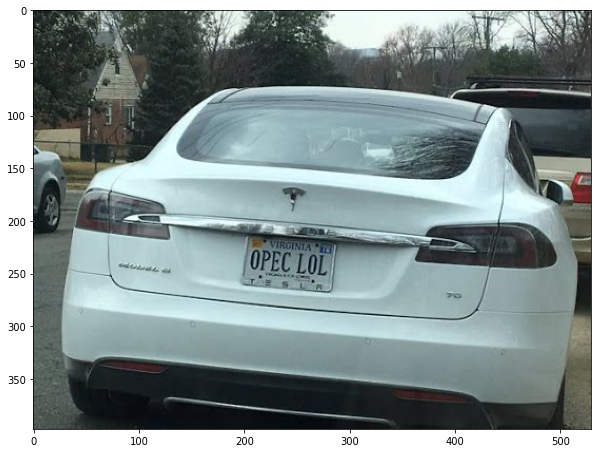

In [7]:
# Составляем путь до файла - /путь/до/папки/имя_изображения.png
image_filename = 'Cars129.png'
image_path = os.path.join(IMAGES_PATH, image_filename)
# Читаем изображение
img = plt.imread(image_path)
# Создаем фигуру и координатную плоскость
fig, ax = plt.subplots(figsize=(10, 8))
# Выводим изображение на экран
ax.imshow(img);
# Выводим размер изображения
print('Image shape: {}'.format(img.shape))

**Примечание:**

*В случае чтения библиотекой matplotlib интенсивность пикселей измеряется от 0 до 1, где 1 соответствует 255 для стандартного формата изображений. 
Вы можете убедиться в этом самостоятельно, выведя прочитанное изображение на экран в виде массива:*


In [8]:
#print(img)

Теперь давайте посмотрим на пример аннотации к этому изображению.

In [9]:
# Прочитаем один из файлов с аннотациями и посмотрим на содержимое
with open(os.path.join(ANNOTATIONS_PATH, 'Cars129.xml')) as f:
    print(f.read())


<annotation>
    <folder>images</folder>
    <filename>Cars129.png</filename>
    <size>
        <width>530</width>
        <height>398</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
        <name>licence</name>
        <pose>Unspecified</pose>
        <truncated>0</truncated>
        <occluded>0</occluded>
        <difficult>0</difficult>
        <bndbox>
            <xmin>204</xmin>
            <ymin>213</ymin>
            <xmax>282</xmax>
            <ymax>267</ymax>
        </bndbox>
    </object>
</annotation>


При использовании аннотации формата PASCAL VOC указываются следующие теги:
* `<annotation>` - корневой заголовок
    * `<folder>` - папка с изображением
    * `<filename>` - имя файла
    * `<size>` - информация о размерах
        * `<width>` - ширина
        * `<height>` - высота
        * `<depth>` - глубина (количество каналов)
    * `<segmented>` - в этом поле указывается информация для сегментации. То есть содержат ли изображения аннотации нелинейной (неправильной) формы, обычно называемые полигонами (у нас таковых не имеется, все рамки прямоугольные поэтому стоит 0)
    * `<object>` - информация для детекции объектов
        * `<name>` - имя класса (в нашем случае - номерной знак).
        * `<pose>` - задает асимметрию или ориентацию изображения. По умолчанию он указан как Unspecified, что означает, что изображение не искажено.
        * `<truncated>` - указывает, является ли объект полностью или частично видимым (может быть 0 или 1 соответственно)
        * `<occluded>` - информация о поглощении классов друг другом (это когда внутри ограничивающего прямоугольника класса А, есть ограничивающий прямоугольник класса B)
        * `<difficult>` - Указывает, трудно ли распознать объект на изображении (может быть 0 - легко или 1 - сложно).
        * `<bndbox>` - это координаты, которые определяют местоположение объекта (в нашем случае - номерного знака автомобиля).
        Эти координаты содержатся в дочерних тегах `<xmin>, <ymin>, <xmax>, <ymax>`. В аннотации хранятся координаты верхнего левого и нижнего правого положений объекта.


Обратите внимание, что система координат, используемая для изображений несколько отличается от той, к которой мы привыкли: вертикальная ось Y берет свое начало из верхнего левого угла изображения и направлена вниз. То есть аннотация приведенная выше определяет следующий bounding box изображения:

<img src= "https://i.ibb.co/nMcHpgB/2023-02-04-17-31-07.png" width="40%" align="center"  hspace="5%" vspace="5%"/> 


Давайте для дальнейшего удобства создадим DataFrame, в котором будем хранить следующие столбцы:
* `filename` - имя файла (без расширения)
* `xmin`, `xmax` - минимальная и максимальная координата рамки по оси x
* `ymin`, `ymax` - минимальная и максимальная координата рамки по оси y
* `width`, `height` - ширина и высота изображения

Для этого воспользуемся следующим кодом для парсинга XML-файлов с аннотациями:


In [10]:
# Инициализируем словарь, на основе которого затем создадим DataFrame
df_dict = {
    "filename":[], "xmin":[], "ymin":[],   
    "xmax":[],"ymax":[], "name":[],    
    "width":[], "height":[],
}

# Создаем цикл по всем аннотациям из 
for annotation in glob.glob(ANNOTATIONS_PATH+"/*.xml"):
    # Читаем XML-файл с аннотацией
    tree = ET.parse(annotation)
    # Находим тег, соответствующий имени файла
    filename = tree.find('filename').text
    # Создаем цикл по всем элементам XML-файла
    for elem in tree.iter():
        # Достаем из аннотации информацию о размере изображения - ширину и высоту
        if 'size' in elem.tag:
            for attr in list(elem):
                if 'width' in attr.tag: 
                    width = int(round(float(attr.text)))
                if 'height' in attr.tag:
                    height = int(round(float(attr.text)))    
        # Достаем информацию о картинке - имя класса и информацию о координатах bounding box 
        if 'object' in elem.tag:
            for attr in list(elem):
                if 'name' in attr.tag:
                    name = attr.text                 
                    df_dict['name'] += [name]
                    df_dict['width'] += [width]
                    df_dict['height'] += [height] 
                    df_dict['filename'] += [filename]
                            
                if 'bndbox' in attr.tag:
                    for dim in list(attr):
                        if 'xmin' in dim.tag:
                            xmin = int(round(float(dim.text)))
                            df_dict['xmin'] += [xmin]
                        if 'ymin' in dim.tag:
                            ymin = int(round(float(dim.text)))
                            df_dict['ymin'] += [ymin]                                
                        if 'xmax' in dim.tag:
                            xmax = int(round(float(dim.text)))
                            df_dict['xmax'] += [xmax]                                
                        if 'ymax' in dim.tag:
                            ymax = int(round(float(dim.text)))
                            df_dict['ymax'] += [ymax]                        

После выполнения этого кода мы получим необходимый нам словарь, преобразуем его в DataFrame:

In [11]:
df = pd.DataFrame(df_dict)
df.head()

filename  xmin  ymin  xmax  ymax     name  width  height
0  Cars339.png   209   135   283   169  licence    500     300
1   Cars13.png   191   147   242   169  licence    400     268
2   Cars74.png   115   115   277   153  licence    400     267
3   Cars16.png    36   175    62   186  licence    400     221
4  Cars291.png    71   205   215   246  licence    517     303

Теперь нам будет очень удобно проанализировать характеристики нашего датасета. Посмотрим на количество записей (аннотаций), уникальное количество изображений и уникальные классы в данных:

In [12]:
print('Data shape: {}'.format(df.shape))
print('Count of unique images: {}'.format(df['filename'].nunique()))
print('Count of classes: {}'.format(df['name'].unique()))


Data shape: (471, 8)
Count of unique images: 433
Count of classes: ['licence']


Видим, что всего аннотаций у нас 471, а вот уникальных изображений меньше - 433. Это означает, что на одном изображении могут быть сразу несколько номерных знаков. Важная особенность датасета! 


Также видим, что класс в данных у нас только один - licence (номерной знак). Это значит, что при выполнении детекции мы с вами будем решать задачу бинарной классификации - отличаться класс номерного знака от фона (все, что номерным знаком не является).


<img src= "https://i.ibb.co/C8TMH8H/2023-02-04-17-33-33.png" width="40%" align="right"  hspace="5%" vspace="5%"/> 
Теперь, когда мы с вами спарсили координаты bounding boxes давайте выберем какое-нибудь изображение из датасета и отобразим его вместе с аннотацией. То есть добавим поверх изображения bounding box. 


Для этого воспользуемся классом [Rectangle](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html) из модуля patches библиотеки matplotlib, он позволяет задать прямоугольник и отобразить его на графике (изображении). Для задания прямоугольника необходимо указать следующие параметры:


* Обязательные:
    * xy - координаты левого нижнего угла на изображении (в пикселях);
    * width и height - ширина и высота прямоугольника; 
* Опциональные:
    * linewidth - ширина линии, рисуемого прямоугольника;
    * edgecolor - цвет ограничивающей рамки, возьмем красный цвет;
    * facecolor - цвет внутренней заливки, так как заливка нам не нужна, то параметр нужно установить в значение 'none';

Из аннотаций нам известны координаты левого верхнего угла bounding box (они задаются столбцами xmin и ymin), а также координаты правого нижнего угла (xmax и ymax). Чтобы вычислить ширину прямоугольника воспользуемся простейшими формулами геометрии:
$$w = x_{max}-x_{min}$$
$$h = y_{max} - y_{min}$$

Также держим в голове тот факт, что для одной картинки может быть сразу несколько bounding box, поэтому для корректной визуализации нам нужен цикл по всем координатам, соответствующим изображению.
Итоговый код будет иметь следующий вид:


[204] [213] [78] [54]


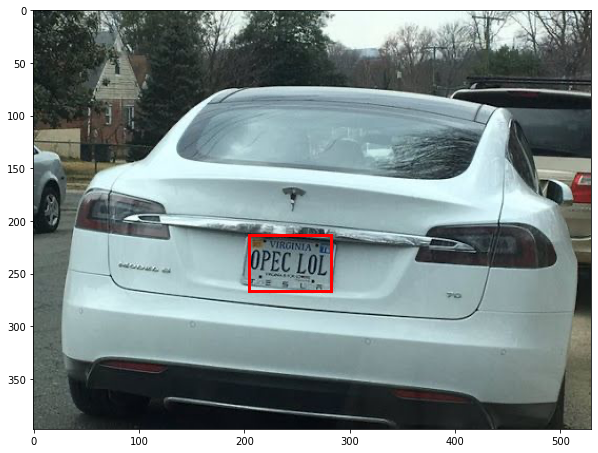

In [13]:
# Составляем путь до файла - /путь/до/папки/имя_изображения.png
image_filename = 'Cars129.png'
image_path = os.path.join(IMAGES_PATH, image_filename)
# Читаем изображение
img = plt.imread(image_path)
# Создаем фигуру и координатную плоскость
fig, ax = plt.subplots(figsize=(10, 8))
# Выводим изображение на экран
ax.imshow(img);

# Находим индекс картинки в DataFrame
image_idx = df[df['filename'] == image_filename].index

# Находим координаты левой нижней точки
x_min = df.loc[image_idx, 'xmin'].values
y_min = df.loc[image_idx, 'ymin'].values
# Находим ширину и высоту рамки
box_width = (df.loc[image_idx, 'xmax'] - df.loc[image_idx, 'xmin']).values
box_height = (df.loc[image_idx, 'ymax'] - df.loc[image_idx, 'ymin']).values
print(x_min, y_min, box_width, box_height)

# Так как боксов может быть несколько, создаем цикл по всем ним
for i in range(len(image_idx)):
    # Строим прямоугольник
    rect = patches.Rectangle(
        (x_min[i], y_min[i]), #Координаты опорной точки
        box_width[i], #ширина прямоугольника
        box_height[i], #высота прямоугольника
        linewidth=3, #ширина линии
        edgecolor='r', #цвет
        facecolor='none' #заливка (none - отсутствует)
    )
    # Накладываем прямоугольник поверх изображения
    ax.add_patch(rect);

Давайте для дальнейшего удобства обернем всю эту пелену кода для визуализации изображений в виде функции, назовем ее `plot_bounding_box()`. Функция будет принимать название файла с нужным изображением и DataFrame с координатами и выводить изображение на экран.

In [14]:
def plot_bounding_box(image_folder, image_filename, df=df):
    # Создаем полный путь до изображения
    image_path = os.path.join(image_folder, image_filename)
    # Читаем изображение
    img = plt.imread(image_path)
    # Создаем фигуру и координатную плоскость
    fig, ax = plt.subplots(figsize=(10, 8))
    # Выводим изображение на экран
    ax.imshow(img);

    # Находим индекс картинки в DataFrame
    image_idx = df[df['filename'] == image_filename].index

    # Находим координаты левой нижней точки
    x_min = df.loc[image_idx, 'xmin'].values
    y_min = df.loc[image_idx, 'ymin'].values
    # Находим ширину и высоту рамки
    box_width = (df.loc[image_idx, 'xmax'] - df.loc[image_idx, 'xmin']).values
    box_height = (df.loc[image_idx, 'ymax'] - df.loc[image_idx, 'ymin']).values
    # Так как боксов может быть несколько, создаем цикл по всем ним
    for i in range(len(image_idx)):
        # Строим прямоугольник
        rect = patches.Rectangle(
            (x_min[i], y_min[i]), #Координаты опорной точки
            box_width[i], #ширина прямоугольника
            box_height[i], #высота прямоугольника
            linewidth=3, #ширина линии
            edgecolor='r', #цвет
            facecolor='none' #заливка (none - отсутствует)
        )
        # Накладываем прямоугольник поверх изображения
        ax.add_patch(rect);

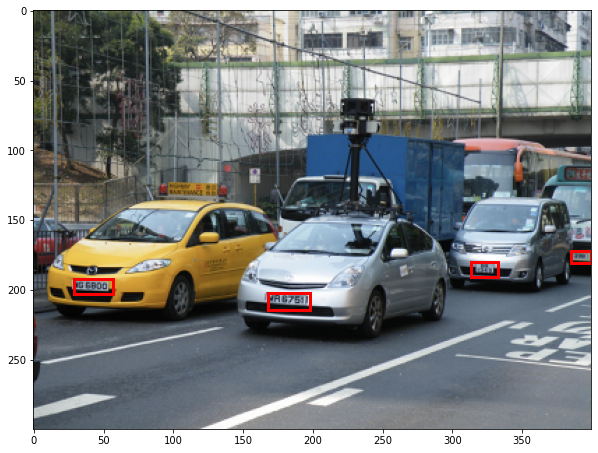

In [15]:
plot_bounding_box(image_folder=IMAGES_PATH, image_filename='Cars330.png', df=df)

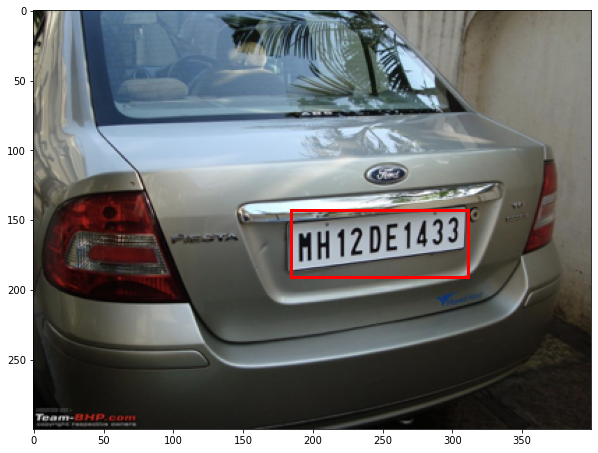

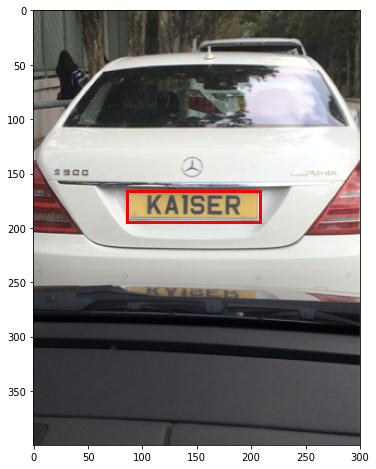

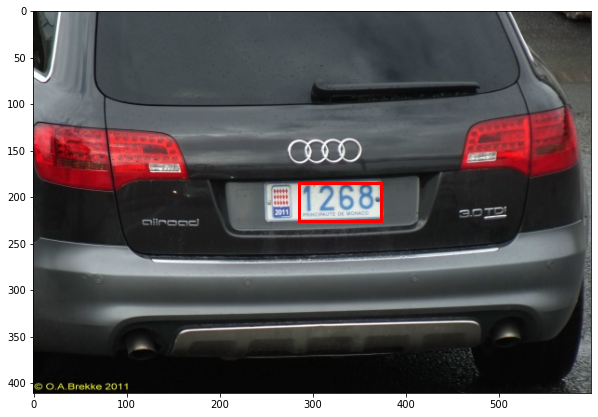

In [16]:
count = 3
for i in range(count):
    random_image_idx = np.random.choice(df.shape[0])
    image_filename = df.loc[random_image_idx, 'filename']
    plot_bounding_box(IMAGES_PATH, image_filename, df)

## Выбираем модель и готовим данные

В мире компьютерного зрения на каждую задачу, будь то классификация, детекция или генерация изображений, существуют свои методы решений (определенные архитектуры нейронных сетей). Однако, на каждую архитектуру нейронной сети найдется десяток ее реализаций. В свою очередь каждая реализация для своего использования требует определенный формат входных данных. 

Поэтому от архитектуры модели и реализации, которую мы выберем, зависит процесс предобработки исходных данных.


## Выбираем модель

Итак, мы с вами уже определились, что на первом этапе построения алгоритма работы ALPR-системы мы решаем задачу детекции - выделение из изображения местоположения интересующего нас объекта, в нашем случае - номерного знака транспортного средства. 

Как мы уже с вами обсуждали ранее, для решения задачи детекции есть как минимум два класса моделей: одноэтапные и двухэтапные. На сегодняшний день несомненным лидером являются одноэтапные модели, а одной из самых популярных и наиболее точных являются модели семейства YOLO.

**Что такое YOLO?**

> **YOLO (абр. от “You Only Look Once” (“Стоит только раз взглянуть”))** - это современный метод глубокого обучения для задач обнаружения объектов (как детекции, так и сегментации), в основе которого лежат сверточные нейронные сети. 
Первая версия алгоритма была разработана в 2016 и на состояние начала 2023 года вышло уже, как минимум, 8 общепринятых модификаций данной модели, каждая из которых имеет свои преимущества и недостатки. Поэтому YOLO - это целое семейство архитектур нейронных сетей для решения задач детекции и сегментации!

Если не вдаваться в подробности, то ключевая идея работы YOLO состоит в том, что исходное изображение разбивается на мелкие секции (они еще называются клетки/сэмплы/тайлы) размером SxS пикселей (для различных версий YOLO параметр S может быть различным).

Каждая полученная становится потенциальным bounding_box’ом. То есть внутри каждой клетки по специальному методу "рисуются" несколько рамок для определения объекта различной ширины и высоты (а также возможно добавление поворота), позиции этих рамок вычисляются относительно центра клетки.

На полученных секциях с помощью специализированной архитектуры сверточной нейронной сети строится карта распределения вероятности каждого из классов в каждой из секций, то есть в каждой из секций определяется вероятность наличия каждого из классов. После результаты специализированным образом совмещаются и мы получаем решение задачи детекции - нужные нам bounding box’ы.

Общая (верхнеуровневая) схема работы YOLO представлена на рисунке ниже:
<img src= "https://miro.medium.com/max/1400/0*Lg8T0ghKhK9XAeW4.png" width="70%" align="center"  hspace="5%" vspace="5%"/> 

Главная особенность архитектуры YOLO - это скорость! YOLO позволяет распознавать объекты на изображении в режиме реального времени. Принцип работы YOLO подразумевает ввод сразу всего изображения, которое проходит через сверточную нейронную сеть только один раз. Именно поэтому он называется “Стоит только раз взглянуть”. В других алгоритмах этот процесс происходит многократно, то есть изображение проходит через CNN снова и снова. Так что YOLO обладает преимуществом высокоскоростного обнаружения объектов, чем не могут похвастать другие алгоритмы.

А как вы понимаете в задаче построения ALPR-систем скорость это один из главных критериев! 

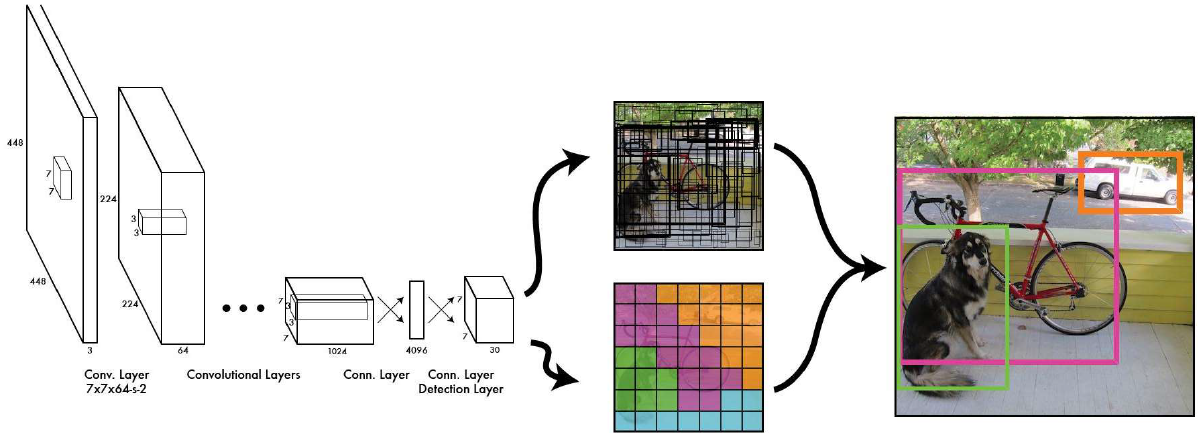

Когда мы выбрали семейство архитектур, нам еще предстоит выбрать версию модели. Например, для YOLO на начало 2023 последней является версия YOLOv8. Мы не будем сейчас останавливаться на том, в чем отличие между всеми версиями модели. Отсылаем вас вот к [этой статье](https://hashdork.com/ru/yolo/), в которой приведено общее сравнение первых 5-ти версий архитектуры. 

Давайте для конкретики, будем использовать не самую молодую, но зато проверенную "боевым опытом", 5-ую версию YOLO - YOLOv5 (2020г.)

<img src= "https://avatars.githubusercontent.com/u/26833451?s=200&v=4" width="10%" align="right"  hspace="5%" vspace="5%"/>

Теперь нам с вами необходимо выбрать реализацию этой модели, так как в интернете их, опять же, великое множество и каждая обладает своими особенностями и требованиями к формату входных данных. В качестве реализации возьмем [репозиторий с реализацией YOLOv5](https://github.com/ultralytics/yolov5) на фреймворке для глубокого обучения PyTorch от компании [Ultralitics](https://ultralytics.com/). 


Если вам это интересно, как же все таки YOLO и ее 5-ая модификация устроены изнутри, рекомендуем вам заглянуть в следующие источники :
* сперва в оригинальную [статью “You Only Look Once”](https://arxiv.org/pdf/1506.02640.pdf) от создателей YOLO (YOLOv1)
* затем вот в [эту статью](https://medium.com/analytics-vidhya/object-detection-algorithm-yolo-v5-architecture-89e0a35472ef), где рассматриваются особенности именно YOLOv5
* и наконец, в репозиторий от Ultralitics, где также собраны подробные туториалы по работе с моделью и [описание архитектуры](https://github.com/ultralytics/yolov5/issues/6998)

Теперь, когда мы выбрали модель, нам необходимо подготовить наши данные таким образом, чтобы мы могли воспользоваться этой моделью.

### Подготавливаем данные под формат YOLOv5

Согласно [документации по созданию custom-моделей](https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data) от Ultralitics для подачи данных в модель YOLOv5 и обучения ее под пользовательскую задачу необходимо специальным образом сформировать директорию с изображениями и аннотациями. 

Для обучения модели необходимо создать файл конфигурации данных в формате YAML. В нем указываются пути до папок с изображениями и аннотациями, которые относятся к тренировочной, валидационной и тестовой (необязательно) выборкам, а также имена классов. На основе этого YOLOv5 от Ultralitics будет понимать, где брать файлы с данными для обучения, валидации и тестирования соответственно.


Например, пусть у нас есть корневая директория датасета, назовем ее dataset:
```
dataset
    └─dataset.yaml
    └─images
        └─train
            └─img1.png
            └─img2.png
        └─val
            └─img3.png
            └─img4.png
    └─labels
        └─train
            └─img1.txt
            └─img2.txt
        └─val
            └─img3.txt
            └─img4.txt
```

Тогда файл конфигурации для такого датасета (dataset.yaml) должен быть следующего формата:

```
path: dataset # корневая директория датасета
train: images/train # папка с изображениями тренировочной выборки
val: images/val # val папка с изображениями валидационной выборки
test: # val папка с изображениями тестовой выборки (пустая)

names: # имена классов
  0: person
  1: bicycle
  2: car
  3: motorcycle
  ...

```
На рисунке ниже представлен пример организации директории, пригодной для работы с моделью YOLOv5:
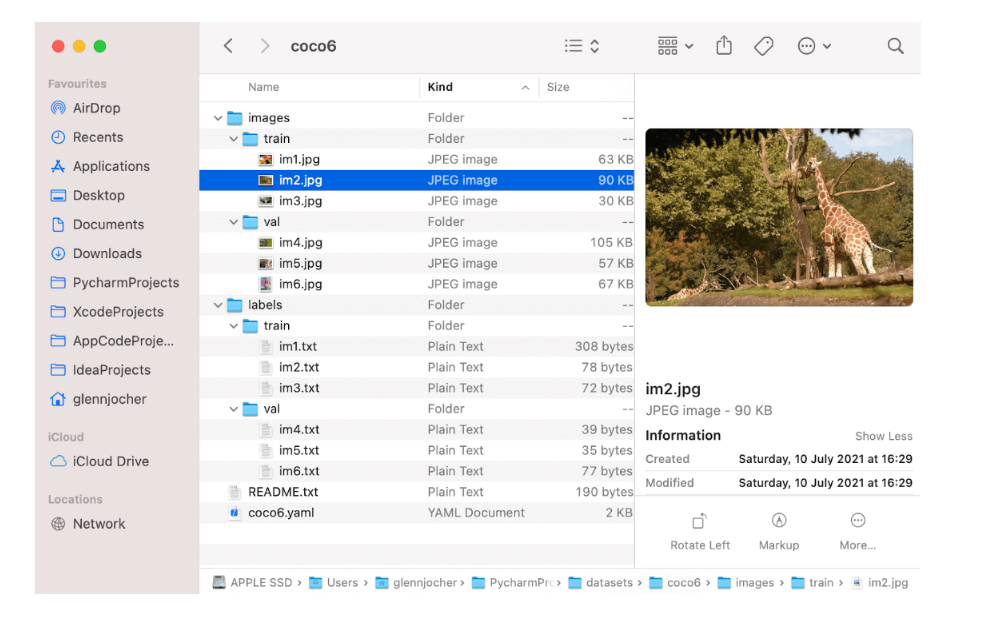 

Перейдем к созданию директорий, о которым мы говорили выше. Зададим пути в виде глобальных переменных:

In [17]:
DATA_PATH = "dataset/" # Корневая папка датасета

LABELS_PATH = os.path.join(DATA_PATH, "labels") # Папка с аннотациями
IMGS_PATH = os.path.join(DATA_PATH, "images") #Папка с изображениями

TRAIN_IMAGES_PATH = os.path.join(IMGS_PATH, "train") #Путь до папки с обучающими изображениями
VAL_IMAGES_PATH = os.path.join(IMGS_PATH, "val") #Путь до папки с валидационными изображениями
TRAIN_LABELS_PATH = os.path.join(LABELS_PATH, "train") #Путь до папки с обучающими аннотациями
VAL_LABELS_PATH = os.path.join(LABELS_PATH, "val") #Путь до папки с валидационными аннотациями

DATA_CONFIG_PATH = os.path.join(DATA_PATH, "dataset.yaml") #Путь до файла конфигураций данных

print(TRAIN_IMAGES_PATH)
print(VAL_IMAGES_PATH)
print(TRAIN_LABELS_PATH)
print(VAL_LABELS_PATH)
print(DATA_CONFIG_PATH)

dataset/images/train
dataset/images/val
dataset/labels/train
dataset/labels/val
dataset/dataset.yaml


Теперь давайте создадим необходимые нам директории. Для этого воспользуемся функцией [makedirs()](https://docs-python.ru/standart-library/modul-os-python/funktsija-makedirs-modulja-os/) из модуля os. Также, чтобы обеспечить воспроизводимость кода и избегания ошибок при перезапусках ноутбука, будем проверять существование создаваемых папок с помощью функции [path.exists()](https://docs.python.org/3/library/os.path.html) из того же модуля.


In [18]:
# Создаем локальную папку, в которую будем складывать изображения и аннотации к ним (если таковой еще не существует)
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)
    
# Создаем папку, где будем хранить тренировочные изображения (если такая еще не существует)    
if not os.path.exists(TRAIN_IMAGES_PATH):
    os.makedirs(TRAIN_IMAGES_PATH)
# Создаем папку, где будем хранить тренировочные аннотации к объектам (если такая еще не существует)
if not os.path.exists(TRAIN_LABELS_PATH):
    os.makedirs(TRAIN_LABELS_PATH)
    
# Создаем папку, где будем хранить валидационные изображения (если такая еще не существует) 
if not os.path.exists(VAL_IMAGES_PATH):
    os.makedirs(VAL_IMAGES_PATH)
    
# Создаем папку, где будем хранить валидационные аннотации к объектам (если такая еще не существует)
if not os.path.exists(VAL_LABELS_PATH):
    os.makedirs(VAL_LABELS_PATH)

В результате выполнения данного кода у нас должна образоваться структура директории как мы приводили выше. Проверим это с помощью команды Linux ls:

In [19]:
!ls dataset
!ls dataset/images
!ls dataset/labels

images	labels
train  val
train  val


Наконец, финальный шаг в подготовке директории. Давайте добавим файл конфигурации данных, назовем его как в примере ранее - dataset.yaml, в нем пропишем все пути, которые мы обсуждали выше.


In [20]:
# Создаем содержимое файла
data_config = f'''
path: /kaggle/working/dataset
train: images/train
val: images/val
test:
names:
    0: licence
'''

# Открываем на запись файл, куда записываем конфигурацию путей, откуда будут браться данные для обучения
with open(DATA_CONFIG_PATH, 'w') as f:
    f.write(data_config)

# Проверим, что все записалось корректно
with open(DATA_CONFIG_PATH, 'r') as f:
    print(f.read())


path: /kaggle/working/dataset
train: images/train
val: images/val
test:
names:
    0: licence



Со структурой директорий разобрались. 

Теперь нам надо их наполнить содержанием - изображениями и аннотациями к ним. Если с изображениями все понятно - просто разделяем картинки на две части - тренировочную и тестовую выборку - и копируем их в новые соответствующие директории, то с аннотациями чуть сложнее.

Давайте зададимся вопросом: как вообще можно задать прямоугольник. Логично предположить, что для того, чтобы построить прямоугольник, необходимо задать его координаты. Причем есть множество способов сделать это. Однако в Object Detection есть две наиболее распространенных возможных практики задания bounding box’ов:
* Указание рамки относительно верхней левой и нижней правой точек прямоугольника.
    Для задания такого bounding box нужны две точки:
    * $(x_1, y_1)$ - координаты верхней левой точки
    * $(x_2, y_2)$ - координаты верхней левой точки
    
    <img src= "https://miro.medium.com/max/640/1*yvPdthNNOJfmcYKsDhJJtQ.webp" width="20%" align="center"  hspace="5%" vspace="5%"/> 
    
* Указание рамки относительно ее центра
    Для задания такого bounding box нужны следующие координаты:
    * $(x_c, y_c)$ - координаты центра прямоугольника
    * $w$ - ширина прямоугольника
    * $h$ - высота прямоугольника
    
    <img src= "https://miro.medium.com/max/640/1*PbBGGN_uSFV13R_aX6FiEA.webp" width="20%" align="center"  hspace="5%" vspace="5%"/> 

Как вы понимаете, реализовать переход из одного формата в другой довольно просто, нужно лишь знать школьный курс геометрии. Например, чтобы перейти из формата относительно верхней левой и нижней правой точек в формат относительно центра изображения, нам понадобятся следующие соотношения:
$$x_c =\frac {x_1+x_2}{2}$$
$$y_c = \frac {y_1+y_2}{2}$$
$$w = x_2-x_1$$
$$h = y_2-y_1$$

Теперь, когда мы разобрались со стандартными форматами, перейдем к формату YOLOv5. 

Для работы YOLOv5 от Ultralitics аннотации должны быть представлены в формате текстового файла (txt). Формат подразумевает, что каждая строка текстового файла представляется в виде:
$$n, \bar{x_c} ,  \bar{y_c} , \bar{w}, \bar{h}  $$

где:
* $n$ — номер класса объекта
* $\bar{x_c}$  — относительная координата центра bounding box’а объекта по оси Ox. 
    Она называется относительной, потому что исходная координата центра нормируется на ширину изображения:
 $$\bar{x_c} =\frac{x_c} {W}=\frac{x_1+x_2}{2W}$$
    где $W$ - ширина исходного изображения (в пикселях)
* $\bar{y_c}$ — относительная координата bounding box’а объекта по оси Oy. Вычисляется по формуле:
 $$\bar{y_c} =\frac{y_c}{H}=\frac{y_1+y_2}{2H}$$
    где $H$ - ширина исходного изображения (в пикселях)
* $\bar{w}$ — относительная ширина bounding box’а объекта. 
    Вычисляется по формуле:
    $$\bar{w}=\frac{w}{W}=\frac{x_2-x_1}{W}$$

* $\bar{h}$ — относительная высота bounding box’а объекта. 
    Вычисляется по формуле:
    $$\bar{h}=\frac{h}{H}=\frac{y_2-y_1}{H}$$

По сути YOLOv5 преобразует систему координат изображения к масштабу от 0 до 1 и в этом масштабе размечаются координаты:
<img src= "https://avatars.mds.yandex.net/i?id=91134d262f52faf8f47ba0b6bab192a3-4960217-images-thumbs&n=13" width="50%" align="center"  hspace="5%" vspace="5%"/> 



Давайте сделаем промежуточный вывод: по сути, нам с вами нужно лишь перейти из исходного формата координат bounding box’ов в новый и записать их в виде текстовых файлов.

Итак, давайте перекодируем классы (он у нас всего один) и рассчитаем новые координаты ограничивающих рамок по заданным выше формулам:


In [21]:
# Перекодируем классы
df['class'] = df['name'].map({'licence': 0})

# Вычисляем нормализованные координаты центра ограничивающей рамки
df['x_center'] = (df['xmin'] + df['xmax']) / (2 * df['width'])
df['y_center'] = (df['ymin'] + df['ymax']) / (2 * df['height'])
# Вычисляем относительную высоту и ширину ограничивающей рамки
df['box_width'] = (df['xmax'] - df['xmin']).abs() / df['width']
df['box_height'] = (df['ymax'] - df['ymin']).abs() / df['height']

# Посмотрим на результаты
df[['class','x_center','y_center','box_width','box_height']].head()

class  x_center  y_center  box_width  box_height
0      0  0.492000  0.506667    0.14800    0.113333
1      0  0.541250  0.589552    0.12750    0.082090
2      0  0.490000  0.501873    0.40500    0.142322
3      0  0.122500  0.816742    0.06500    0.049774
4      0  0.276596  0.744224    0.27853    0.135314

Отлично, данные мы подготовили. Перед тем как производить запись новых координат в файлы, создадим тренировочную и валидационную выборку. 

Разделим все множество доступных нам изображении на два в соотношении 90/10. Обратите внимание, мы должны учитывать, что у нас на одном изображении может быть несколько bounding box’ов. Это значит, что для создания выборок нам необходимы уникальные файлы, иначе может получиться так, что и в тестовую и валидационную выборку попадут одни и те же изображения и оценка модели по валидационной выборке получится необъективной:


In [22]:
# Создаем общий список названий файлов с изображениями
image_ids = list(set(df['filename']))
# Разделяем этот список на два - тренировочную и валидационную выборку
train_ids, val_ids = train_test_split(image_ids, random_state=42, test_size=0.1)
# Посмотрим на размеры выборок
print('Train shape: {}'.format(len(train_ids)))
print('Validation shape: {}'.format(len(val_ids)))

Train shape: 389
Validation shape: 44


Наконец, заполним наши папки: 
* папки с аннотациями заполним txt-файлами с форматом данных, который мы обговаривали выше
* папки с изображениями заполним изображениями из соответствующих выборок


In [23]:
# Создаем цикл по изображениям
for filename, mini in tqdm(df.groupby('filename')):
    # Если текущий файл находится в валидационной выборке
    if filename in val_ids:
        path2save = 'val'
    # В противном случае (тренировочная выборка)
    else:
        path2save = 'train'
    # Составляем путь до файла, куда запишем новую аннотацию
    new_annotation_path = os.path.join(LABELS_PATH, path2save, filename[:-4] + ".txt")
    # Открываем на запись с добавлением (w+) файл формата .txt
    with open(new_annotation_path, 'w+') as f:
        # Выделяем координаты bounding box в формате, требуемым для YOLOv5
        row = mini[['class','x_center','y_center','box_width','box_height']].astype(float).values
        row = row.astype(str)
        # Построчно записываем координаты каждого из bounding box на изображении
        for j in range(len(row)):
            text = ' '.join(row[j])
            f.write(text)
            f.write("\n")
    # Переносим в новую папку изображения из исходной папки
    sh.copy(
        os.path.join(IMAGES_PATH, filename),
        os.path.join(IMGS_PATH, path2save, filename)
    )

  0%|          | 0/433 [00:00<?, ?it/s]

Посмотрим на то, что у нас получилось. С помощью функции [listdir()](https://docs-python.ru/standart-library/modul-os-python/funktsija-listdir-modulja-os/) из модуля os выведем список 30 файлов в директориях обучающей выборки `'dataset/labels/train/'` и `'dataset/images/train/'`:

In [24]:
print(os.listdir(TRAIN_LABELS_PATH)[:30])
print(os.listdir(TRAIN_IMAGES_PATH)[:30])

['Cars89.txt', 'Cars129.txt', 'Cars74.txt', 'Cars423.txt', 'Cars338.txt', 'Cars325.txt', 'Cars370.txt', 'Cars101.txt', 'Cars65.txt', 'Cars385.txt', 'Cars192.txt', 'Cars231.txt', 'Cars12.txt', 'Cars208.txt', 'Cars47.txt', 'Cars296.txt', 'Cars276.txt', 'Cars82.txt', 'Cars429.txt', 'Cars0.txt', 'Cars289.txt', 'Cars106.txt', 'Cars228.txt', 'Cars396.txt', 'Cars332.txt', 'Cars32.txt', 'Cars235.txt', 'Cars146.txt', 'Cars241.txt', 'Cars136.txt']
['Cars423.png', 'Cars381.png', 'Cars170.png', 'Cars280.png', 'Cars250.png', 'Cars10.png', 'Cars424.png', 'Cars22.png', 'Cars164.png', 'Cars406.png', 'Cars328.png', 'Cars42.png', 'Cars121.png', 'Cars310.png', 'Cars67.png', 'Cars217.png', 'Cars118.png', 'Cars179.png', 'Cars44.png', 'Cars260.png', 'Cars315.png', 'Cars275.png', 'Cars345.png', 'Cars237.png', 'Cars23.png', 'Cars65.png', 'Cars204.png', 'Cars285.png', 'Cars271.png', 'Cars221.png']


Посмотрим, как выглядят наши аннотации, на примере файла 'Car277.txt':

0.0 0.15 0.761168384879725 0.06 0.024054982817869417
0.0 0.35875 0.7577319587628866 0.0475 0.024054982817869417
0.0 0.7475 0.7714776632302406 0.045 0.030927835051546393
0.0 0.95125 0.7371134020618557 0.0375 0.01718213058419244



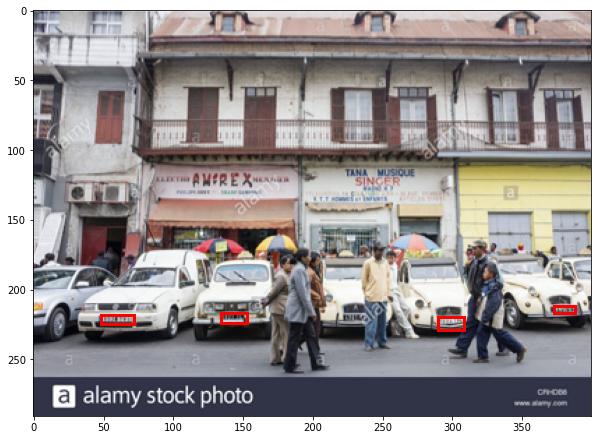

In [25]:
# Откроем файл с аннотацией и прочитаем содержимое
with open(os.path.join(TRAIN_LABELS_PATH, 'Cars277.txt')) as f:
    txt_example = f.read()
# Выведем содержимое на экран
print(txt_example)
# Посмотрим на то, как выглядит сама картинка
plot_bounding_box(TRAIN_IMAGES_PATH, 'Cars277.png', df)

Проверим, что количество аннотаций совпадает с количеством изображений:


In [26]:
# Проверим, что количество аннотаций совпадает с количество изображений в каждой выборке
print(len(os.listdir(TRAIN_LABELS_PATH)) == len(os.listdir(TRAIN_IMAGES_PATH)))
print(len(os.listdir(VAL_LABELS_PATH)) == len(os.listdir(VAL_IMAGES_PATH)))

True
True


Все готово! Мы подготовили наш датасет для обучения модели YOLOv5. В итоге у нас должна была получиться следующая структура папок:
```
kaggle
    └─input
        └─car-plate-detection
            └─annotations
            └─images
    └─working
        └─__notebook_source__.ipynb
        └─dataset
            └─dataset.yaml
            └─images
                └─train
                └─val
            └─labels
                └─train
                └─val
```

## Строим модель детекции

### Клонируем репозиторий с моделью

Давайте клонируем репозиторий с YOLOv5 и установим необходимые для ее работы зависимости:

In [27]:
# Клонируем репозиторий с моделью YOLO-v5
!git clone https://github.com/ultralytics/yolov5
# Устанавливаем зависимости, необходимые для работы модели
!pip install -qr yolov5/requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 15070, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 15070 (delta 33), reused 27 (delta 12), pack-reused 15001
Receiving objects: 100% (15070/15070), 14.15 MiB | 18.62 MiB/s, done.
Resolving deltas: 100% (10324/10324), done.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-cloud 0.1.13 requires tensorflow<3.0,>=1.15.0, which is not installed.


В результате клонирования в нашей рабочей директории (kaggle/working) появится папка yolov5 с копией кода для создания и обучения модели. Посмотрим на содержимое папки yolov5, чтобы удостовериться в том, что все прошло успешно:


In [28]:
!ls

__notebook__.ipynb  dataset  yolov5


In [29]:
!ls yolov5

CITATION.cff	 README.zh-CN.md  detect.py   requirements.txt	tutorial.ipynb
CONTRIBUTING.md  benchmarks.py	  export.py   segment		utils
LICENSE		 classify	  hubconf.py  setup.cfg		val.py
README.md	 data		  models      train.py


Давайте перейдем в директорию yolov5 в системе, воспользовавшись командой cd. Дальнейшую работу будем вести, находясь в этой папке:

В папке yolov5 хранятся файлы из репозитория, в частности, нас могут заинтересовать следующие папки/скрипты:
* data - папка с некоторыми классическими датасетами
* models - папка с предобученными весами модели, которые можно использовать, чтобы не обучать модель с абсолютного нуля
* train.py - скрипт для обучения модели
* val.py - скрипт для валидации модели
* tutorial.ipynb - ноутбук с туториалом по использованию модели
* utils - модуль с полезными утилитами, которые могут нам понадобится при работе с моделью


Давайте зафиксируем датчик генератора случайных чисел, чтобы в дальнейшем получать воспроизводимые результаты. Для этого в репозитории yolov5 в модуле utils.general есть функция init_seeds(), в которую нужно передать любое число. Чтобы корректно вызвать эту функцию необходимо перейти в директорию yolov5 и вызвать функцию, находясь в ней. Для перемещения между директориями воспользуемся функцией [os.chdir()](https://docs-python.ru/standart-library/modul-os-python/funktsija-chdir-modulja-os/) из модуля os.

По традиции в качестве random_state возьмем 42. После фиксации всех генераторов случайных чисел вернемся в исходную рабочую директорию.


In [30]:
# Перемещаемся в директорию yolov5
os.chdir('yolov5')
# Импортируем оттуда функцию init_seeds
from utils.general import init_seeds
#Фиксируем генератор случайных чисел для воспроизводимости результатов
RANDOM_STATE = 42
init_seeds(RANDOM_STATE)
# Возвращаемся обратно в рабочую директорию
os.chdir('../')

Во время обучения модели YOLOv5 в реализации от Ultralitics для сохранения процесса обучения используется инструмент Weights&Bias (W&B). [Weights&Bias](https://docs.wandb.ai/) - это платформа машинного обучения, позволяющая разработчикам быстрее создавать лучшие модели и отслеживать их качества. Она позволяет использовать легкие, совместимые инструменты W&B для быстрого отслеживания экспериментов, версификации и итерации наборов данных, оценки производительности модели, воспроизведения моделей, визуализации результатов и выявления регрессий, а также обмена результатами с коллегами.


Для работы с этой платформой нужно авторизоваться в ней с помощью предоставляемого API. Так как мы заранее не регистрировались на платформе, то воспользуемся анонимным аккаунтом. Для авторизации нам установить библиотеку wandb и вызвать оттуда функцию login.

In [31]:
!pip install -q wandb --upgrade

import wandb
wandb.login(anonymous='must')

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
allennlp 2.5.0 requires wandb<0.11.0,>=0.10.0, but you have wandb 0.13.9 which is incompatible.


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

Теперь мы можем воспользоваться модель и дообучить ее под нашу задачу на заданном датасете.

### Обучаем модель

Для обучения модели в репозитории yolov5 предназначен скрипт train.py. Для его запуска необходимо указать следующие ключи:

* `--img` - размер изображения, подаваемого на вход YOLOv5. Это значит, что размер исходного изображения преобразуется к виду $n x n$, где $n$ — число, введенное пользователем после ключа —img;

    **Важно:** 
    $n$ должно быть кратно 32 (это связано с архитектурой YOLOv5). 32 в данном случае - это размер одного сегмента, о котором мы говорили, когда обсуждали общую идею работы YOLO.
* `--batch` - размер батча, то есть число картинок, подаваемых в сеть за один шаг обучения;
* `--epochs` - количество эпох обучения, задает сколько раз датасет будет пропущен через нейронную сеть для ее обучения;
* `--data` - путь до файла формата .yaml, который мы создавали выше;
* `--weights` - предобученные веса, используемые моделью; 
* `--name` - имя папки, куда сохраняем результаты обучения.

Ключ `--weights` отвечает за выбор предобученной модели. 

На практике мы почти всегда используем заранее предобученную на другом датасете модель и адаптируем ее под нашу задачу. В частности модель YOLOv5 является предобученной на популярном датасете COCO, о котором вы можете почитать [здесь](https://cocodataset.org/#home). Это датасет в котором используется 80 различных классов от человека и собак до самолетов и автомобилей.

Конечно же, среди этих классов нашего (номерной знак транспортного средства) не найдется, однако мы можем использовать паттерны и шаблоны, усвоенные во время обучения на датасете COCO и адаптировать их под нашу задачу. Такой подход называется **переносом обучения (Transfer Learning)**.

Для YOLOv5 существуют несколько возможных вариантов предобученных весов в зависимости от размера моделей. Их список и характеристики (размер в мегабайтах, скорость обучения и среднюю метрику качества mAP на датасете COCO) вы можете видеть ниже:

<img src= "https://github.com/ultralytics/yolov5/releases/download/v1.0/model_comparison.png" width="50%" align="center"  hspace="5%" vspace="5%"/> 

Запустим обучение:

In [32]:
# Запускаем файл train.py со скриптом для обучения модели

!python yolov5/train.py \
--img 640 \
--batch 10 \
--epochs 30 \
--data {DATA_CONFIG_PATH} \
--weights yolov5s.pt \
--name my_yolov5_model_s

wandb: Currently logged in as: anony-mouse-487971. Use `wandb login --relogin` to force relogin
train: weights=yolov5s.pt, cfg=, data=dataset/dataset.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=10, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=my_yolov5_model_s, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-74-gd02ee60 Python-3.7.10 torch-1.7.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bi

**Примечание:**
*Обратите внимание на то, что все результаты обучения сохраняются в runs/train/каталогах с увеличением количества запусков. То есть результаты первого запуска сохранятся в каталог `my_yolov5_model_s`, второго в каталог `my_yolov5_model_s2`, третьего в `my_yolov5_model_s3` и т.д. Будьте внимательны при запуске обучения несколько раз подряд!*

Процесс обучения запущен! Дождемся его окончания (это может занять некоторое время). А пока модель обучается давайте обсудим основные показатели, на которые стоит обратить внимание во время ее обучения:

В выводе сначала идет информация об оптимизаторе, тренировочном и валидационном датасетах, а также параметры обучения – такие как размер входного изображения, количество потоков, директория с результатами обучения.

Далее представлена  информация о процессе самого обучения. Имеются три функции потерь:
* `box_loss` — функция потерь регрессии в ограничительной рамке (среднеквадратичная ошибка - MSE, вычисленная относительно предсказанных и истинных координат bounding box’а). 

    Чем ближе данный показатель к 0, тем лучше модель определяет координаты bounding box’а.
* `obj_loss` — уверенность в присутствии объекта - это потеря объектности.

    Чем ближе данный показатель к 0, тем с большей уверенностью определяет местоположение объекта.
* `cls_loss` — потеря классификации (перекрестная энтропия), определяет, насколько правильно модель отличает классы друг от друга.

    Чем ближе данный показатель к 0, тем лучше модель различает классы между собой. 

Далее идут показатели метрик. Здесь следует обратить внимание на столбцы `P`, `R`, `mAP@.5` и `mAP@.5:.95` – в них записаны значения метрик precision, recall и двух вариантов метрики mAP соответственно. Мы не будем сейчас останавливаться на этих метриках, них можно почитать [тут](https://jonathan-hui.medium.com/map-mean-average-precision-for-object-detection-45c121a31173). Отметим лишь то, что все метрики измеряются от 0 до 1, чем ближе к 1, тем лучше.


### Валидируем модель

Когда модель закончит свое обучение, то в консоле будет указано, куда будут сохранены итоговые результаты.

В эту папку будет сохранена история обучения нашей модели в виде csv-файлов и различными графиками в формате. Давайте посмотрим:


In [33]:
!ls yolov5/runs/train/my_yolov5_model_s/

F1_curve.png					   results.png
PR_curve.png					   train_batch0.jpg
P_curve.png					   train_batch1.jpg
R_curve.png					   train_batch2.jpg
confusion_matrix.png				   val_batch0_labels.jpg
events.out.tfevents.1675521513.c6e8784987b2.133.0  val_batch0_pred.jpg
hyp.yaml					   val_batch1_labels.jpg
labels.jpg					   val_batch1_pred.jpg
labels_correlogram.jpg				   val_batch2_labels.jpg
opt.yaml					   val_batch2_pred.jpg
results.csv					   weights


Посмотрим на графики, наиболее общая информация, представляющая для нас интерес содержится в файле results.png.


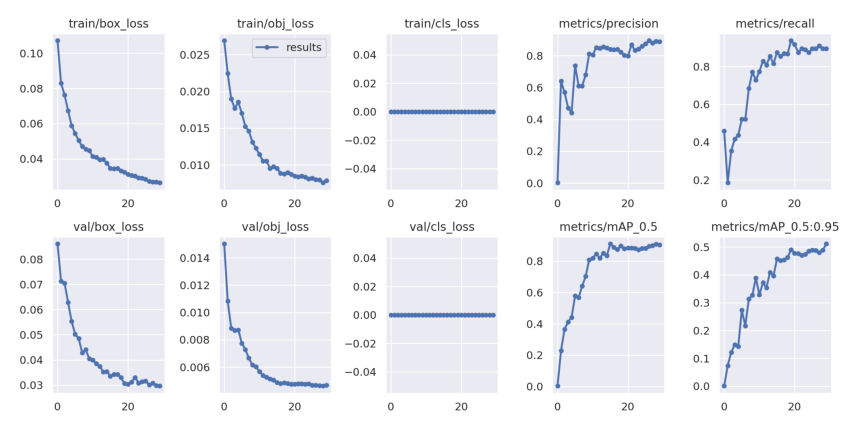

In [34]:
# Читаем файл с графиками процесса обучения
results = plt.imread('yolov5/runs/train/my_yolov5_model_s/results.png')
# Отображаем графики
fig, ax = plt.subplots(figsize=(15,12))
ax.axis('off')
ax.imshow(results);

В папке runs/result/weights хранятся 2 файла с весами (параметрами нейронной сети):
* best.pt — файл, в котором сохранен лучший вариант параметров модели за все время обучения
* last.pt — файл, в котором сохранены веса, которые модель получила на последней эпохе обучения


**Примечание:**

*Лучшая модель не всегда (почти никогда) последняя!*


In [35]:
!ls yolov5/runs/train/my_yolov5_model_s/weights

best.pt  last.pt


Давайте загрузим наилучшие веса в нашу модель. 

Для этого в модуле hub библиотеки pytorch есть функция load(). Данная функция позволяет PyTorch автоматически загружать модели из репозиториев на GitHub или же из локальных директорий и "наполнять" их значениями параметров из файлов:
* repo_or_dir - путь до директории и репозитория, где хранится модель. У нас это директория, куда сохранился репозиторий - yolov5;
* model - имя модели. В YOLOv5 все пользовательские модели обозначаются как 'custom';
* path - путь до весов модели. Указываем путь до файла best.pt; 
* source - источник, может быть 'local', если модель берется из локальной директории или 'github', если модель скачивается с github. 
    У нас все уже загружено в рабочую папку, поэтому ставим 'local'.


In [36]:
# Путь до места, где хранятся лучшие веса
BEST_WEIGHTS_PATH = 'yolov5/runs/train/my_yolov5_model_s/weights/best.pt'
# Загружаем лучшие веса
yolov5 = torch.hub.load(
    repo_or_dir='yolov5',
    model='custom',
    path=BEST_WEIGHTS_PATH,
    source='local'
)

requirements: YOLOv5 requirement "tqdm>=4.64.0" not found, attempting AutoUpdate...

requirements: 1 package updated per /kaggle/working/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v7.0-74-gd02ee60 Python-3.7.10 torch-1.7.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


Давайте проверим работу нашей лучшей модели, возьмем какую-нибудь картинку и подадим ее на вход модели. Для этого достаточно воспользоваться объектом yolov5 как функцией, передав в качестве ее параметра путь до файла. Можно сразу же отобразить результат, для этого просто вызовем метод show(): 

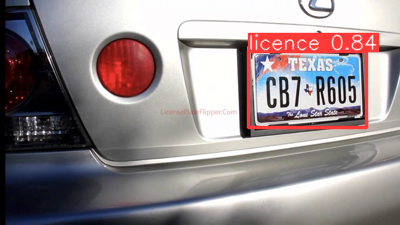

In [37]:
# Путь до изображения
image_filename = 'Cars351.png'
image_path = os.path.join(IMAGES_PATH, image_filename)
# Пропускаем картинку через модель
prediction = yolov5(image_path)
# Отображаем результат
prediction.show()

Число, рядом с именем класса называется confidence. **Confidence** измеряется от 0 до 1 и характеризует «уверенность» модели в том, что данный объект является объектом определенного класса. Иначе говоря - это вероятность того, что в заданном bounding box'е содержится объект указанного класса.

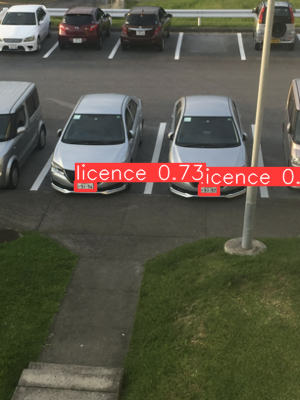

In [38]:
# Путь до изображения
image_filename = 'Cars352.png'
image_path = os.path.join(IMAGES_PATH, image_filename)
# Пропускаем картинку через модель
prediction = yolov5(image_path)
# Отображаем результат
prediction.show()

Полученный результат довольно легко конвертировать в DataFrame, для этого YOLOv5 предоставляет функциональность в виде метода pandas():

In [39]:
# Путь до изображения
image_filename = 'Cars352.png'
image_path = os.path.join(IMAGES_PATH, image_filename)
# Пропускаем картинку через модель
prediction = yolov5(image_path)
# Конвертируем результат в DataFrame:
prediction.pandas().xyxy[0]

xmin        ymin        xmax        ymax  confidence  class     name
0   75.945747  181.193787   95.377647  190.489059    0.731536      0  licence
1  199.957443  185.565796  218.239426  194.341766    0.456224      0  licence

> **Примечание:**

    Важно отметить, что мы можем самостоятельно отсекать такие bounding box’ы, доверие к которым меньше некоторой константы (confidence_rate), тем самым влияя на итоговые метрики precision и recall нашей модели в продакшене. 

    Например, если нам нужно распознавать как можно больше (recall) номерных знаков и ложные срабатывания нам не так страшны (например, при контроле трафика на дорогах), то мы можем взять низкий уровень доверия. Тем самым мы увеличиваем recall.

    Если же нам нужно как можно точнее (precision) определять номерные знаки, игнорируя шумы, (например, на платных парковках) то мы повысим пороговое значение доверия. 

    Как мы знаем,  для идеальной модели и precision и recall равны 1, но идеальных моделей не бывает. Поиск оптимального для вашей задачи порога доверия - это отдельная проблема, решение которой индивидуально для каждой конкретной системы.


По полученным координатам можно вручную реализовать вырезку изображений с номерными знаками из исходных. Однако, и тут разработчики YOLOv5 позаботились об этом за нас.

Модель поддерживает встроенный метод crop(). Данный метод возвращает список из словарей, каждый словарь характеризуем отдельно-взятый bounding box - его координаты (ключ "box"), уровень доверия (ключ "confidence"), номер класса объекта (ключ "class"), название класса (ключ "label") и собственно само вырезанное изображение (ключ "im").

Давайте посмотрим пример вырезки. Будем отсекать такие вырезки, доверие к которым < 0.7:


Saved 1 image to runs/detect/exp
Saved results to runs/detect/exp



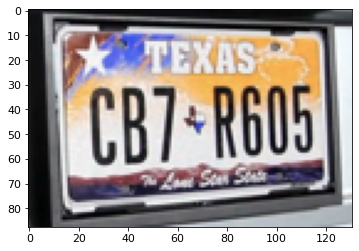

In [40]:
# Путь до изображения
image_filename = 'Cars351.png'
image_path = os.path.join(IMAGES_PATH, image_filename)
# Пропускаем картинку через модель
prediction = yolov5(image_path)
# Делаем вырезки из изображения
croped = prediction.crop()
# Создаем цикл по каждой вырезке
for pred in croped:
    # Отсекаем такие bounding box'ы, доверие к которым < 0.7
    if pred['conf'] < 0.7:
        continue
    # Достаем вырезанное изображение
    img_croped = pred['im']
    # Визуализируем результат
    fig = plt.figure()
    plt.imshow(img_croped)

Отлично, выглядит довольно неплохо! 

Нам остался финальный шаг - давайте упакуем предсказания модели для каждого изображения из исходного датасета в виде таблицы.


Для этого организуем цикл по всем изображениям из датасета и сконкатенируем все предсказания в один DataFrame. Будем отсекать такие bounding box’ы, для которых доля уверенности (confidence) < 0.7. 


In [41]:
# Список всех файлов с изображениями
filenames = df['filename']
# Создаем пустой DataFrame
pred_df = pd.DataFrame()
# Создаем цикл по всем файлами
for filename in tqdm(filenames):
    # Составляем путь до изображения
    image_path = os.path.join(IMAGES_PATH, filename)
    # Пропускаем изображение через модель
    prediction = yolov5(image_path)
    # Конвертируем предсказания в DataFrame
    pred_rows = prediction.pandas().xyxy[0]
    # Оставляем bounding box'ы, доверие к которым > 0.7
    pred_rows = pred_rows[pred_rows['confidence'] > 0.7]
    # Добавляем в DataFrame столбец с именем файла для ясности
    pred_rows['filename'] = filename
    # Конкатенируем полученный DataFrame к общей таблице
    pred_df = pred_df.append(pred_rows)
# Сбрасываем индекс
pred_df = pred_df.reset_index(drop=True)    
pred_df.head()

  0%|          | 0/471 [00:00<?, ?it/s]

xmin        ymin        xmax        ymax  confidence class     name  \
0  212.696487  137.937759  282.171356  170.639374    0.871465     0  licence   
1  191.870117  144.819656  242.091827  169.199768    0.841279     0  licence   
2  114.522011  115.155907  277.671356  154.566620    0.845043     0  licence   
3   38.825535  174.099243   59.069389  187.680023    0.834222     0  licence   
4   87.483414  165.930359  208.164124  193.730927    0.812866     0  licence   

      filename  
0  Cars339.png  
1   Cars13.png  
2   Cars74.png  
3   Cars16.png  
4  Cars429.png

In [42]:
print(pred_df.shape)

(520, 8)


Можно сохранить DataFrame с предсказанными координатами bounding box’ов как один из артефактов вашей работы, чтобы впоследствии проанализировать результаты.


In [43]:
#Сохраняем полученные предсказания в виде таблицы
pred_df.to_csv('dataset/yolov5_predictions.csv', index=False)

Можно визуализировать несколько эталонных и предсказанных bounding box'ов и оценить результаты

In [44]:
# count = 3
# for i in range(count):
#     random_image_idx = np.random.choice(df.shape[0])
#     image_filename = df.loc[random_image_idx, 'filename']
#     plot_bounding_box(IMAGES_PATH, image_filename, df)
#     plot_bounding_box(IMAGES_PATH, image_filename, pred_df)

Не забудьте сохранить все артефакты (файлы с данными и весами модели), которые мы получили в процессе исполнения кода в ноутбуке. Это важно сделать, так как в противном случае после выхода из Kaggle-ноутбука все файлы будут удалены и вам придется запускать процесс предобработки данных и обучения заново, чтобы получить модель.


По итогу этого этапа нашей работы нам останется отдать файл с весами нашей обученной модели команде разработчиков нашей ALPR-системы, чтобы они на ее базе смогли решать задачи обнаружения номерных знаков по изображениям с камер видеонаблюдения!